# Competition/Domain/Health Care Data/Stroke prediction Dataset

In this project we are analysing the dataset- 'stroke prediction dataset' which is taken from kaggle.com and in this project we will predict whether a patient will have a heart stroke or not based on his/her health conditions , work, and lifestyle.

In [1]:
# importing sufficient packeges to read and analyze data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1.Data collection and impoting data**

data set name: stroke_prediction_dataset.csv
The data is a open source data taken from kaggle.com

In [ ]:
#importing data into the python environment

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#Checking the basic nature of data

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data.shape

(5110, 12)

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Inferences: 
            1.This dataset contains 5110 observations with 11 features satifies the requirement(above 2000x10).
            2.This dataset lists multiple features like gender, age, glucose level, BMI, smoking status etc. and 
              the target  variable: stroke.
            3.The feature name 'bmi' contains 201 null values so we have take care of that.

**2.Data Pre-Precessing**

In [7]:
# we are looking for the outliers(if available) and null values on some particular independed variables

Text(0.5, 1.0, 'Missing values heatmap')

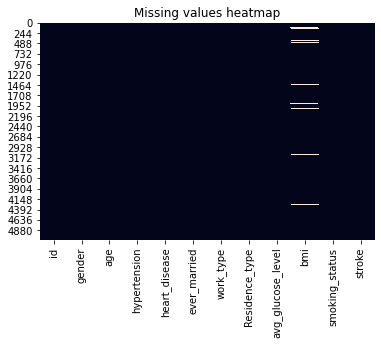

In [8]:
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

insight: As we noted previously only the feature 'bmi' contains null values we take care of this lately.

Text(0.5, 1.0, 'Box plot of age')

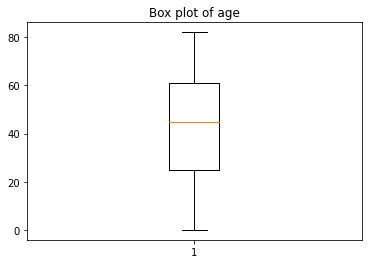

In [9]:
plt.boxplot(data['age'])
plt.title('Box plot of age')

insight: The age group is in a uniform range since no outliers are located.

Text(0.5, 1.0, 'Box plot of hypertension')

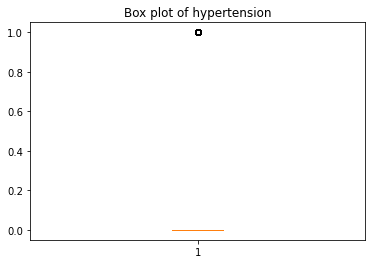

In [10]:
plt.boxplot(data['hypertension'])
plt.title('Box plot of hypertension')

In [ ]:
insight: seems fine

Text(0.5, 1.0, 'Box plot of bmi')

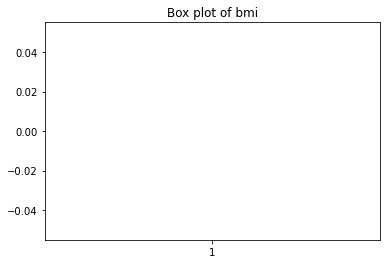

In [11]:
plt.boxplot(data['bmi'])
plt.title('Box plot of bmi')

insight: Although null values are present in the feature 'bmi' it is out of ouliers.

Text(0.5, 1.0, 'Box plot of avg_glucose_level')

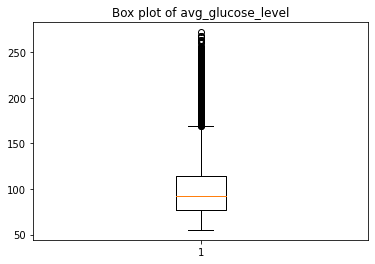

In [12]:
plt.boxplot(data['avg_glucose_level'])
plt.title('Box plot of avg_glucose_level')

insight: Even though some patients are showing a significant variation in their average glucose level it is quite possible to consider them as the real values since we are dealing with medical datas.

In [ ]:
# now we importing packages for data preprocessing

In [13]:
from sklearn import preprocessing
from pandas import Series, DataFrame

In [14]:
# Function for encoding nominal data
# performing onehot encoding
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [15]:
def preprocess_inputs(df):
    df = df.copy()
    
    # drop id column
    df = df.drop('id', axis = 1)
    
    # binary encoding
    df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})
    df['Residence_type'] = df['Residence_type'].replace({'Urban':1,'Rural':0})
    
    #one hot encoding
    for column in ['gender','work_type','smoking_status']:
        df = onehot_encode(df,column = column)
    
    #Replcacing null values with mean of the data
    df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
    
    return df

In [16]:
# Stored the preprocessed data into the variable X
X = preprocess_inputs(data)

In [17]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0


insight:we could see that all the necessary encodings are performed.

In [19]:
X.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.893237,0.048728,0.585910,0.413894,0.000196,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.698018,0.215320,0.492612,0.492578,0.013989,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

insight: Null values are removed from the column 'bmi'

Description: Here we performed the following things:
1. Checking outliers
2. removing null values
3. performed binary encoding for features 'ever_married' and 'Residence_type'
4. Performed onehot encoding for three ordinal features 'gender', 'work_type' and 'smoking_status'
5. we shall also perform the scaling operations later to analyse that really makes any effect in the model classifcations.

**3.Exploratory Data Analysis**

In [22]:
#set color for data visualization
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#EAE0D5","figure.facecolor":"#EAE0D5", "grid.color":"#C6AC8F",
            "axes.edgecolor":"#C6AC8F", "axes.labelcolor":"#0A0908", "xtick.color":"#0A0908",
            "ytick.color":"#0A0908"})

palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])

In [23]:
#1.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


insights:The dataset contains 10 featues for a total of 5110 patients. These feqtures included patients
demographic data (gender, age, marital status, type of work and residence type) and health records (hypertension, heart disease, average glucose level measured after meal, Body Mass Index (BMI), 
smoking status and experience of stroke).

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count of Patient')

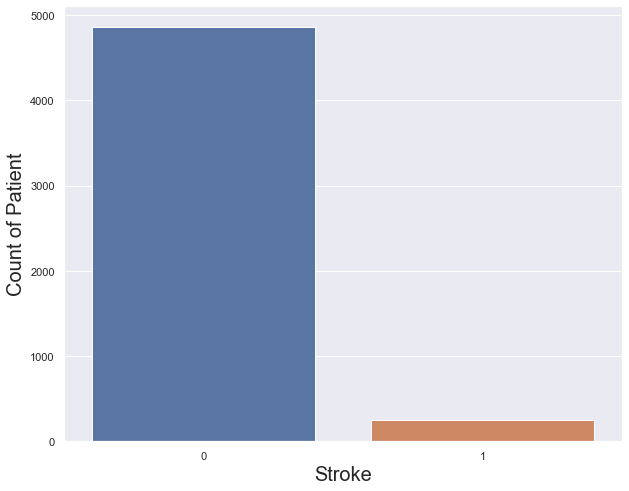

In [25]:
#2.
# Count of Patients that suffer from stroke along with those that did not.
sns.set(rc={'figure.figsize':(10,8)})
seaborn_plot = sns.countplot(data['stroke'])
seaborn_plot.set_xlabel("Stroke",fontsize=20)
seaborn_plot.set_ylabel("Count of Patient",fontsize=20)

In [26]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Conclusion: Out of 5110 patients only 249 are previously affected by stroke while the remaining 4861 patients did not have the experience

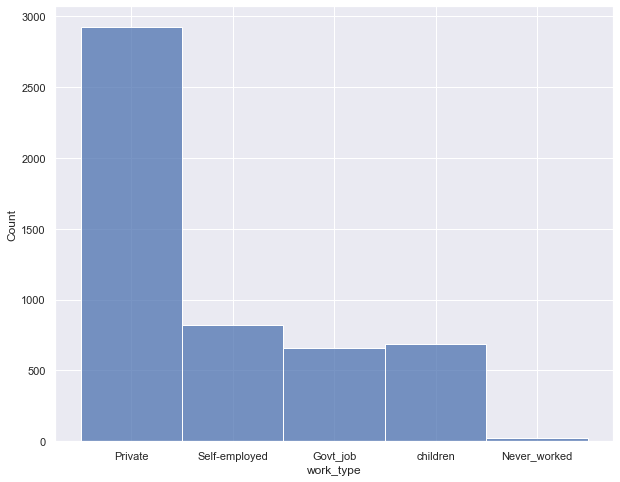

In [27]:
#3.
sns.histplot(x='work_type', data=data )
plt.show()

Insight: More people are doing private job.

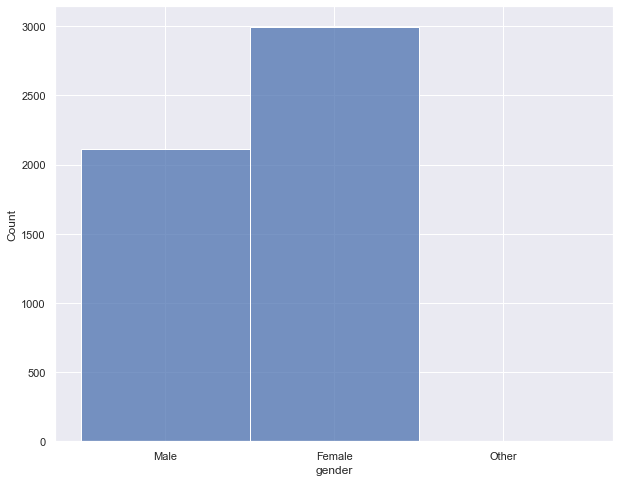

In [28]:
#4.
sns.histplot(x='gender', data=data )
plt.show()

In [29]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Insight: #(male) = 2115 and #(female) = 2994

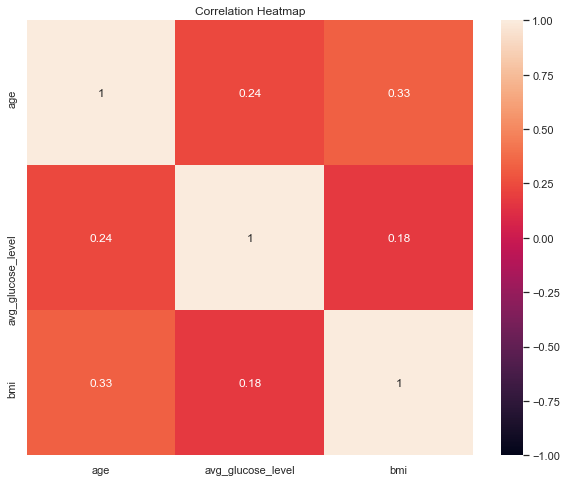

In [30]:
#5.
# Create the correlation heatmap
heatmap = sns.heatmap(data[['age', 'avg_glucose_level', 'bmi']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

Insight : Both BMI and Age were positively correlated, though the association was not strong.

Yes    3353
No     1757
Name: ever_married, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

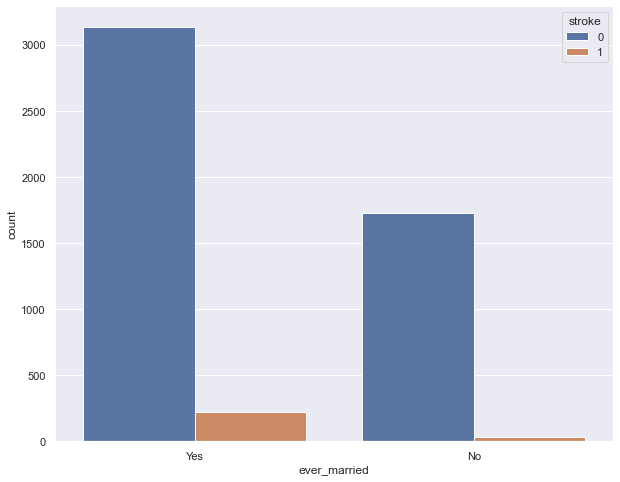

In [31]:
print(data['ever_married'].value_counts())
sns.countplot(data['ever_married'],hue = data['stroke'])

Insights:
1. Most of the patients are married in the given dataset. 
2. The marital status by itself is not a significant factor in predicting the likely hood of a stroke

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


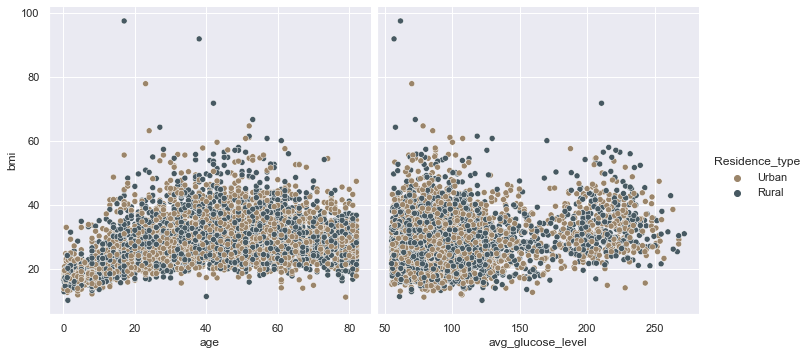

In [32]:
#6.
sns.pairplot(data=data, y_vars='bmi', x_vars=['age', 'avg_glucose_level'], hue='Residence_type',
             size=5, palette=['#9B856A', '#475962'])

Insight: Most people  has bmi score in range 10 to 60 and there is no difference for people who live in urban or rural area. Both urban and rural data are equally distributed means the area doesn't make any impact on the bmi. 

<AxesSubplot:>

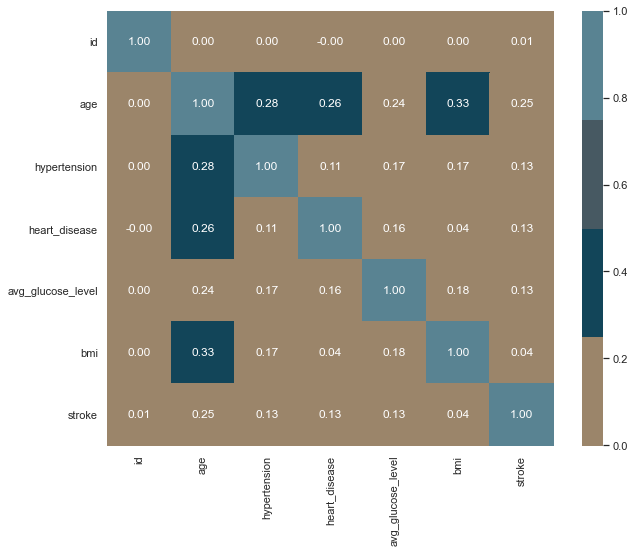

In [33]:
#7.
import matplotlib.ticker as mtick
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=cmap)

Insight: The id column completely has no correlation to predict stroke. Furthermore, correlation between bmi and stroke 
is very low (under 0.05).

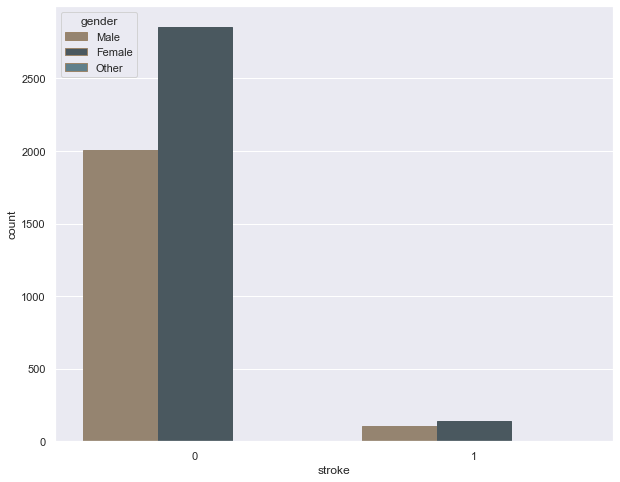

In [45]:
#8.
ax = sns.countplot(data=data, x='stroke', hue='gender', palette=palettes, edgecolor=palettes)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

Insight: Total number of female who got stroke is bigger than male.

**4.Modelling**

The preprocessed data is stored in the variable X. In order to start the modelling process we need to extract the target and feature variables. The project is to predict whether the patient having these medical standard will have stroke or not.
So the target varaiable or depended variable is 'stroke' only. The other independed features are the constraints for our modelling.
The second step after fixing target data is to split the dataset into train and test sets.
Then we train the set with respective classifiers and test its accuracy with test sets.

In [35]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0


In [37]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [38]:
X.shape

(5110, 20)

19 featues are used for the prdiction

**Dividing dataset into train and test sets**

In [36]:
x = X.drop(['stroke'], axis = 1)
y = X['stroke']

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
# we use 75% data for training and the remaining for testing purpose
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [42]:
x_train.shape

(3832, 19)

In [43]:
x_test.shape

(1278, 19)

**Model Fitting and Testing** 

In [46]:
#Model 1 :Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [49]:
print("Accuracy is:",accuracy_score(y_test,y_pred) )
print("Precision_score is:",precision_score(y_test,y_pred,pos_label='positive',average='micro') )
print("Recall_score:",recall_score(y_test,y_pred,pos_label='positive',average='micro') )
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 0.9374021909233177
Precision_score is: 0.9374021909233177
Recall_score: 0.9374021909233177
f1_score is: 0.9374021909233177


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [50]:
y_test.value_counts()

0    1198
1      80
Name: stroke, dtype: int64

In [51]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[1198,    0],
       [  80,    0]], dtype=int64)

In [52]:
#insight: only 80 positive class data points were incorrectly classified as belonging to the negative class by the model

In [53]:
#model 2 : SVM classifier
from sklearn.svm import SVC
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)

In [55]:
print("Accuracy is:",accuracy_score(y_test,y_pred) )


Accuracy is: 0.9374021909233177


In [56]:
#model 3: KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

In [57]:
print("Accuracy is:",knnmodel.score(x_test,y_pred))
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 1.0
f1_score is: 0.9334898278560251


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [58]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[1191,    7],
       [  78,    2]], dtype=int64)

In [59]:
#model 4:Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
y_pred = dtmodel.predict(x_test)

In [60]:
print("Accuracy is:",dtmodel.score(x_test,y_pred))

Accuracy is: 1.0


In [61]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[1136,   62],
       [  69,   11]], dtype=int64)

In [62]:
#Model 5 Random Forest Algo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [63]:
# To check the accuracy of the model

In [64]:
print("The f1 score is:", f1_score(y_test,y_pred,pos_label='positive',average='micro'))
print("The confusion matrix is:",confusion_matrix(y_test,y_pred))

The f1 score is: 0.9374021909233177
The confusion matrix is: [[1198    0]
 [  80    0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Explanation: We have used 5 differen classifiers(SVC,KNN,Logistic Regression,Random Forest, Decision Tree Classifier) and check each model accuracy as well. The decision tree classifier provides 100% accuracy but there are comparatively larger number of misclassifications. So we need check for some hyper parametric tuning techniques for the best model of our problem. 
We also checked the effect of standard scaling make any effect in the data. The accuracy value is not much prgressive in all cases, in some classifiers the accuracy is reduced drastically. So we avoid that.

**5.Model Fine Tuning**

The above 5 models for predicting categorical output, with the help of cross validation we evaluate the performance of each model using recall and accuracy score. By simply taking the mean of both scores, we know which model has the highest score indicating it has the best performance for this project.
Metrics we use:

Accuracy --> Ratio of correctly predicted observation to the total observations
Recall --> Ratio of correctly predicted positive observations to the all observations in actual class

In [67]:
from sklearn.model_selection import cross_val_score
all_model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), SVC()]

In [68]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, x_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [69]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'SVC']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score.style.background_gradient(cmap=cmap,high=1,axis=0)

,Model,Accuracy,Recall
0,LogisticRegression,0.955637,0.000000
1,KNeighborsClassifier,0.949636,0.005882
2,DecisionTreeClassifier,0.916501,0.206985
3,RandomForestClassifier,0.954333,0.005882
4,SVC,0.955898,0.000000


Performance of each model is described above. Since accuracy is in a specific range for all classifiers except Decision Tree classifier it's better to have a high recall since we don't want to predict someone has no stroke, but he actually has stroke. From this consideration, We choose Decision Tree Classifier as our final model.

In [ ]:
# The varaible oc is used to denote the optimized classifier - Decision Tree Classifier

In [71]:
oc = DecisionTreeClassifier()
oc.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
pred = oc.predict(x_test)

In [75]:
print(confusion_matrix(y_test, pred, labels=(1,0)))


[[  12   68]
 [  66 1132]]


In [85]:
X.head(2)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0


In [86]:
X.tail(2)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5108,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0
5109,44.0,0,0,1,1,85.28,26.2,0,1,0,0,1,0,0,0,0,1,0,0,0


In [88]:
def prediction(feat_value):
    
    return oc.predict(feat_value)

In [83]:
# testing for row 0
prediction([[67,0,1,1,1,228,36,0,1,0,0,0,1,0,0,0,1,0,0]])

array([1], dtype=int64)

In [87]:
# testing for row 5109
prediction([[44,0,0,1,1,85,26,1,0,0,1,0,0,0,0,1,0,0,0]])

array([0], dtype=int64)

Conclusion: The prediction works perfectly.

**Hyper Parameter Tuning(Grid search CV)**

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# checking the parameters of Decision Tree Classifier

In [106]:
oc.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
param_dist = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,None]}

In [108]:
grid = GridSearchCV(oc, param_dist, cv = 10,n_jobs = -1)

In [109]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [110]:
# we can extract all from here

In [111]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [112]:
grid.best_index_

0

In [113]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [114]:
grid.best_score_

0.9558977915578764

insight: we will have a maximum accuracy of 95% with this settings in Decision tree classifier

In [115]:
grid.classes_

array([0, 1], dtype=int64)

******